In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [40]:
data = pd.read_csv('data/final_data.csv')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [42]:
data.iloc[0]

Unnamed: 0                                                       2
address                         Address: 1160 Mission Street #2007
info              San FranciscoSales price: 1300000Sales date: ...
z_address                                1160 Mission St UNIT 2007
bathrooms                                                        2
bedrooms                                                         2
finishedsqft                                                  1043
lastsolddate                                            02/17/2016
lastsoldprice                                              1.3e+06
latitude                                                   37.7787
longitude                                                 -122.413
neighborhood                                       South of Market
totalrooms                                                       4
usecode                                                Condominium
yearbuilt                                                     

In [43]:
data.loc[:, 'zindexvalue'] = data['zindexvalue'].str.replace(',', '').astype(int)

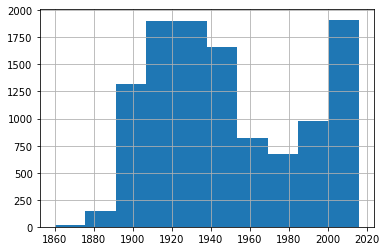

In [44]:
data['yearbuilt'].hist()

In [45]:
# np.floor(data['yearbuilt'] / 10) # убирает дробные части
data.loc[:, 'build_generation'] = np.ceil(data['yearbuilt'] / 10).astype(int) # увеличивает целую часть на 1, если имеется дробная часть
data.loc[:, 'build_generation'] = data.loc[:, 'build_generation'] - data.loc[:, 'build_generation'].min()

In [46]:
data.loc[:, 'lastsolddate'] = pd.to_datetime(data['lastsolddate'])
data.loc[:, 'sold_year'] = data['lastsolddate'].dt.year

In [47]:
data.loc[:, 'sold_year'].value_counts()

2014    3342
2015    3296
2013    2744
2012    1336
2016     455
2011      99
2007       7
2006       7
2003       7
2009       7
2004       5
2008       4
1996       3
1997       3
2010       3
2005       2
2000       2
2002       2
1972       1
1970       1
1979       1
1988       1
1998       1
1992       1
Name: sold_year, dtype: int64

In [48]:
# data.query('sold_year > 2011')

In [49]:
data = data[data.loc[:, 'sold_year'] > 2011]

In [50]:
data.loc[:, 'lot_size'] = data['info'].str.extract(r'Lot size: (\d+)').loc[:, 0].astype(int)

In [51]:
# info_data = data['info'].str.extract(r'Sales price: (\d+\.?\d*)Sales date: (\d{2}\/\d{2}\/\d{4})Bedrooms: (\d+)Square feet: (\d+\.?\d*)Lot size: (\d+)')
# info_data.columns = ['sales_price', 'sales_date', 'bedrooms', 'sqft', 'lot_size']

# info_data.loc[:, 'sales_price'] = info_data['sales_price'].astype(float)
# info_data.loc[:, 'sales_date'] = pd.to_datetime(info_data['sales_date'])
# info_data.loc[:, 'bedrooms'] = info_data['bedrooms'].astype(float)
# info_data.loc[:, 'sqft'] = info_data['sqft'].astype(float)
# info_data.loc[:, 'lot_size'] = info_data['lot_size'].astype(int)

# data = data.join(info_data, rsuffix='_info')
# info_data

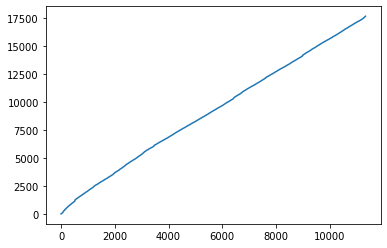

In [52]:
plt.plot(data['Unnamed: 0'].index, data['Unnamed: 0'].values)
plt.show()

In [53]:
data.pop('Unnamed: 0')

0            2
1            5
2            7
3            9
4           11
         ...  
11325    17615
11326    17619
11327    17623
11328    17624
11329    17632
Name: Unnamed: 0, Length: 11173, dtype: int64

In [54]:
data.drop(['address', 'info', 'lastsolddate', 'sold_year', 'z_address', 'yearbuilt', 'zpid'], axis=1, inplace=True)
data.head(5)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,zindexvalue,zipcode,build_generation,lot_size
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,1167508.0,975700,94103.0,15,43557
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,823719.0,975700,94107.0,15,213232
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,1708594.0,1277600,94107.0,15,2496
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,2411236.0,1277600,94107.0,7,2469
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1918539.0,1248000,94110.0,4,1750


In [55]:
data.drop(['latitude', 'longitude', 'zipcode', 'build_generation'], axis=1).describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,zestimate,zindexvalue,lot_size
count,11173.000000,11173.000000,11173.000000,1.117300e+04,11173.000000,1.117300e+04,1.117300e+04,1.117300e+04
mean,1.979773,2.613085,1584.803365,1.270172e+06,6.107491,1.564090e+06,1.320500e+06,2.100207e+04
std,1.046528,1.296749,920.258345,1.045819e+06,12.203651,1.226663e+06,5.857068e+05,6.884693e+05
min,0.500000,0.000000,1.000000,5.350000e+02,1.000000,4.323850e+05,6.881000e+05,0.000000e+00
25%,1.000000,2.000000,1019.000000,7.300000e+05,4.000000,9.051080e+05,9.829000e+05,2.375000e+03
50%,2.000000,2.000000,1361.000000,9.980000e+05,5.000000,1.230148e+06,1.211900e+06,2.996000e+03
75%,2.000000,3.000000,1876.000000,1.450000e+06,7.000000,1.727711e+06,1.480400e+06,5.227000e+03
max,14.000000,20.000000,27275.000000,2.388900e+07,1264.000000,1.553325e+07,5.333500e+06,7.100000e+07


Что заметили:
1. bathrooms - Странное (дробное) значение +
2. bedrooms - Странно: 0 
3. finishedsqft и totalrooms - большие значения max
4. finishedsqft - нереальный min
5. bathrooms + и bedrooms + - max +
6. lastsoldprice - max стоимости
7. lastsoldprice и zestimate - сопоставить на предмет опечаток

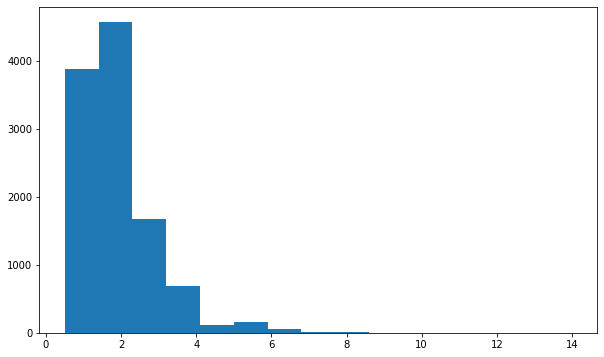

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(data['bathrooms'], bins=15)
plt.show()

In [57]:
data.shape

(11173, 14)

In [58]:
data[data['bathrooms'] >= 8]

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,zindexvalue,zipcode,build_generation,lot_size
346,14.0,7.0,1308.0,1000000.0,37.708635,-122.462835,Outer Mission,7.0,SingleFamily,804491.0,814200,94112.0,16,2500
427,8.0,7.0,9190.0,13075000.0,37.794473,-122.439703,Pacific Heights,16.0,SingleFamily,15048610.0,1910700,94123.0,5,5623
675,8.5,5.0,5894.0,9950000.0,37.793434,-122.431918,Pacific Heights,11.0,SingleFamily,10232127.0,1910700,94115.0,6,4464
927,8.0,8.0,6317.0,2700000.0,37.787706,-122.454028,Presidio Heights,20.0,Duplex,7105947.0,5333500,94118.0,5,3438
4211,14.0,7.0,1308.0,1000000.0,37.708635,-122.462835,Outer Mission,7.0,SingleFamily,812791.0,804400,94112.0,16,2500
5198,8.0,6.0,4012.0,11000000.0,37.790217,-122.454870,Presidio Heights,11.0,SingleFamily,9757758.0,5244900,94118.0,8,9008
5505,12.0,9.0,1853.0,1575000.0,37.754135,-122.423429,Mission,9.0,SingleFamily,2144324.0,1167700,94110.0,15,2820
5983,8.0,9.0,3786.0,2150000.0,37.747840,-122.413321,Bernal Heights,16.0,Duplex,3093874.0,1214400,94110.0,5,2495
7818,12.5,6.0,9125.0,8800000.0,37.792711,-122.441055,Pacific Heights,16.0,SingleFamily,5965458.0,1884400,94115.0,8,4965
7913,9.0,9.0,4460.0,930000.0,37.787319,-122.449851,Presidio Heights,16.0,SingleFamily,5274079.0,5244900,94118.0,4,3469


In [59]:
data = data[data['bathrooms'] < 8]
data.head(5)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,zindexvalue,zipcode,build_generation,lot_size
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,1167508.0,975700,94103.0,15,43557
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,823719.0,975700,94107.0,15,213232
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,1708594.0,1277600,94107.0,15,2496
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,2411236.0,1277600,94107.0,7,2469
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1918539.0,1248000,94110.0,4,1750


In [60]:
is_half_bath = data['bathrooms'] % 1 != 0
data[is_half_bath]

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,zestimate,zindexvalue,zipcode,build_generation,lot_size
8,3.50,4.0,2700.0,3500000.0,37.752602,-122.435011,Noe Valley,9.0,SingleFamily,3604950.0,1782000,94114.0,6,2944
17,4.50,4.0,2615.0,2300000.0,37.763849,-122.421259,Mission,9.0,SingleFamily,1613306.0,1185400,94103.0,5,1503
24,1.50,2.0,1429.0,1410500.0,37.783401,-122.476049,Central Richmond,6.0,Condominium,1170744.0,1485300,94121.0,7,3000
29,2.50,2.0,2063.0,1700000.0,37.744348,-122.455305,Forest Hill Extension,10.0,SingleFamily,1755644.0,1669300,94127.0,8,3101
34,1.25,2.0,1621.0,1325000.0,37.763108,-122.479527,Central Sunset,6.0,SingleFamily,1225848.0,1125700,94122.0,6,2374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,1.25,2.0,1621.0,1325000.0,37.763108,-122.479527,Central Sunset,6.0,SingleFamily,1239993.0,1111300,94122.0,6,2374
11292,3.75,4.0,1846.0,1525000.0,37.742271,-122.470518,West Portal,5.0,SingleFamily,1228368.0,1551600,94116.0,8,4046
11302,3.50,3.0,2435.0,2050000.0,37.738831,-122.439262,Diamond Heights,7.0,SingleFamily,2022309.0,1070100,94131.0,12,2585
11319,2.50,4.0,2166.0,1600000.0,37.757681,-122.401578,Potrero Hill,11.0,MultiFamily2To4,1602420.0,1264000,94107.0,5,2495


In [86]:
data.loc[:, 'full_bathrooms'] = np.floor(data['bathrooms'])
data.loc[:, 'other_bathrooms'] = (data['bathrooms'] - data['full_bathrooms'])
data = data[data.loc[:, 'other_bathrooms'].isin([0.0, 0.25, 0.5, 0.75])]
data.loc[:, 'other_bathrooms'] = data['other_bathrooms'].astype(str)
data.drop(['bathrooms'], axis=1, inplace=True)

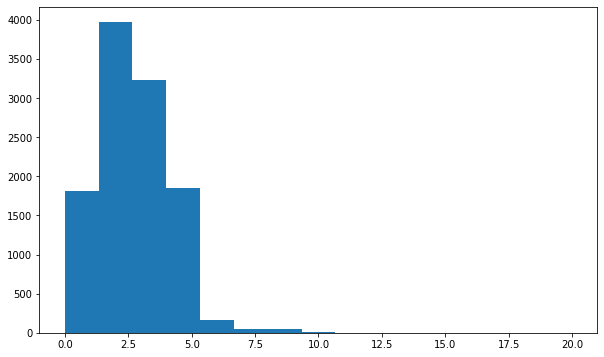

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(data['bedrooms'], bins=15)
plt.show()

In [93]:
data.loc[:, 'zero_bedrooms'] = (data['bedrooms'] == 0).astype(int)
data = data[data['bedrooms'] != 20]

In [ ]:
!pip install pandas_profiling

In [ ]:
import pandas_profiling

In [ ]:
data.profile_report()